In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests
from collections import Counter

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import sqrt
%matplotlib inline

In [62]:
car = pd.read_csv('CarDataset.csv')
car.shape

(3575, 17)

In [63]:
car.head(2)

Unnamed: 0        Make     Model  Year  Engine Fuel Type  Engine HP  \
0        3995         GMC  Envoy XL  2005  regular unleaded      275.0   
1        7474  Volkswagen    Passat  2016  regular unleaded      170.0   

   Engine Cylinders Transmission Type      Driven_Wheels  Number of Doors  \
0               6.0         AUTOMATIC   rear wheel drive              4.0   
1               4.0         AUTOMATIC  front wheel drive              4.0   

  Market Category Vehicle Size Vehicle Style  highway MPG  city mpg  \
0             NaN        Large       4dr SUV           18        13   
1             NaN      Midsize         Sedan           38        25   

   Popularity   MSRP  
0         549  29695  
1         873  30495

In [64]:
car.tail(2)

Unnamed: 0     Make   Model  Year  Engine Fuel Type  Engine HP  \
3573       11350   Nissan   Versa  2015  regular unleaded      109.0   
3574        9732  Hyundai  Sonata  2016  regular unleaded      185.0   

      Engine Cylinders Transmission Type      Driven_Wheels  Number of Doors  \
3573               4.0         AUTOMATIC  front wheel drive              4.0   
3574               4.0         AUTOMATIC  front wheel drive              4.0   

     Market Category Vehicle Size Vehicle Style  highway MPG  city mpg  \
3573             NaN      Compact         Sedan           40        31   
3574             NaN      Midsize         Sedan           36        25   

      Popularity   MSRP  
3573        2009  17590  
3574        1439  27350

In [65]:
car.describe()

Unnamed: 0         Year    Engine HP  Engine Cylinders  \
count   3575.000000  3575.000000  3553.000000       3565.000000   
mean    5908.503776  2010.392168   248.857304          5.630856   
std     3417.643113     7.642183   107.137513          1.785039   
min        0.000000  1990.000000    55.000000          0.000000   
25%     3004.500000  2007.000000   170.000000          4.000000   
50%     5825.000000  2015.000000   227.000000          6.000000   
75%     8865.000000  2016.000000   300.000000          6.000000   
max    11913.000000  2017.000000  1001.000000         16.000000   

       Number of Doors  highway MPG     city mpg   Popularity          MSRP  
count      3575.000000  3575.000000  3575.000000  3575.000000  3.575000e+03  
mean          3.423497    26.592448    19.767832  1527.545175  4.009793e+04  
std           0.887459     8.580068     9.571211  1424.985536  5.919261e+04  
min           2.000000    12.000000     7.000000    21.000000  2.000000e+03  
25%           2.000000    22.000000    15.000000   549.000000  2.108000e+04  
50%           4.000000    26.000000    18.000000  1385.000000  2.999500e+04  
75%           4.000000    30.000000    22.000000  2009.000000  4.168750e+04  
max           4.000000   111.000000   137.000000  5657.000000  1.705769e+06

In [66]:
cars = car.dropna()

In [67]:
cars.rename(columns={'Engine HP':'EngineHP'}, inplace=True)
cars.rename(columns={'Engine Cylinders':'EngineCylinders'}, inplace=True)
cars.rename(columns={'Number of Doors':'NumberOfDoors'}, inplace=True)
cars.rename(columns={'highway MPG':'highwaympg'}, inplace=True)
cars.rename(columns={'city mpg':'citympg'}, inplace=True)
cars.rename(columns={'Engine Fuel Type':'FuelType'}, inplace=True)
cars.rename(columns={'Engine HP':'EngineHP'}, inplace=True)
cars.rename(columns={'Transmission Type':'Transmission'}, inplace=True)
cars.rename(columns={'Driven_Wheels':'Drive'}, inplace=True)
cars.rename(columns={'Engine HP':'EngineHP'}, inplace=True)
cars.rename(columns={'Market Category':'MarketCategory'}, inplace=True)
cars.rename(columns={'Vehicle Size':'Size'}, inplace=True)
cars.rename(columns={'Vehicle Style':'Style'}, inplace=True)

In [68]:
cars.to_csv("CleanData.csv")
print("Shape: ")
cars.shape

Shape: 


(2418, 17)

In [69]:
cars.head(2)

Unnamed: 0   Make Model  Year                        FuelType  EngineHP  \
4         747  Volvo   740  1991                regular unleaded     162.0   
6        4759   Ford  Flex  2016  premium unleaded (recommended)     365.0   

   EngineCylinders Transmission             Drive  NumberOfDoors  \
4              4.0    AUTOMATIC  rear wheel drive            4.0   
6              6.0    AUTOMATIC   all wheel drive            4.0   

       MarketCategory     Size  Style  highwaympg  citympg  Popularity   MSRP  
4  Luxury,Performance  Midsize  Sedan          20       17         870   2000  
6           Crossover    Large  Wagon          21       15        5657  42600

In [70]:
cars.tail(2)

Unnamed: 0  Make          Model  Year                  FuelType  \
3570        9010   GMC   Savana Cargo  2015  flex-fuel (unleaded/E85)   
3572        5025  Ford  Fusion Hybrid  2016          regular unleaded   

      EngineHP  EngineCylinders Transmission              Drive  \
3570     285.0              8.0    AUTOMATIC   rear wheel drive   
3572     188.0              4.0    AUTOMATIC  front wheel drive   

      NumberOfDoors MarketCategory     Size      Style  highwaympg  citympg  \
3570            3.0      Flex Fuel    Large  Cargo Van          17       11   
3572            4.0         Hybrid  Midsize      Sedan          41       44   

      Popularity   MSRP  
3570         549  31415  
3572        5657  25675

In [71]:
cars.describe()

Unnamed: 0         Year     EngineHP  EngineCylinders  NumberOfDoors  \
count   2418.000000  2418.000000  2418.000000      2418.000000    2418.000000   
mean    5787.280397  2012.127378   273.681555         5.776261       3.403226   
std     3450.315205     6.296848   112.685753         1.886077       0.904147   
min        0.000000  1990.000000    55.000000         0.000000       2.000000   
25%     2996.500000  2010.000000   190.000000         4.000000       2.000000   
50%     5685.500000  2015.000000   265.000000         6.000000       4.000000   
75%     8688.750000  2016.000000   317.000000         6.000000       4.000000   
max    11913.000000  2017.000000  1001.000000        16.000000       4.000000   

        highwaympg      citympg   Popularity          MSRP  
count  2418.000000  2418.000000  2418.000000  2.418000e+03  
mean     26.500827    19.458230  1445.509098  4.948870e+04  
std       6.450938     6.634755  1373.709831  6.935564e+04  
min      12.000000     7.000000    21.000000  2.000000e+03  
25%      22.000000    16.000000   520.000000  2.567875e+04  
50%      26.000000    18.000000   873.000000  3.497250e+04  
75%      30.000000    22.000000  1851.000000  4.794125e+04  
max     111.000000   137.000000  5657.000000  1.705769e+06

## Selecting Numeric columns

In [72]:
numcar1 = cars.drop(columns="Make")
numcar2 = numcar1.drop(columns="Model")
numcar3 = numcar2.drop(columns="FuelType")
numcar4 = numcar3.drop(columns="Transmission")
numcar5 = numcar4.drop(columns="Drive")
numcar6 = numcar5.drop(columns="MarketCategory")
numcar7 = numcar6.drop(columns="Size")
numcar = numcar7.drop(columns="Style")
numcar.head(3)

Unnamed: 0  Year  EngineHP  EngineCylinders  NumberOfDoors  highwaympg  \
4         747  1991     162.0              4.0            4.0          20   
6        4759  2016     365.0              6.0            4.0          21   
7        6423  1994     230.0              6.0            2.0          24   

   citympg  Popularity   MSRP  
4       17         870   2000  
6       15        5657  42600  
7       16         204   2384

# Data Exploration

## Checking for Outliers - BoxPlots

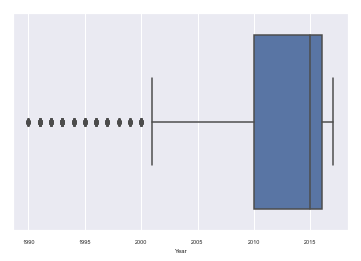

In [73]:
sns.boxplot(x=cars['Year'])

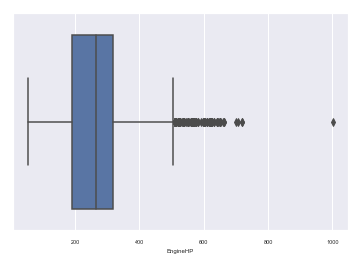

In [74]:
sns.boxplot(x=cars['EngineHP'])

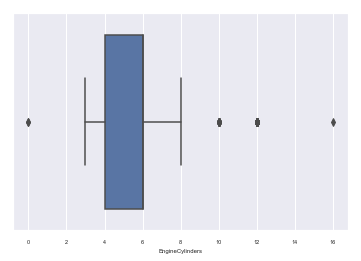

In [75]:
sns.boxplot(x=cars['EngineCylinders'])

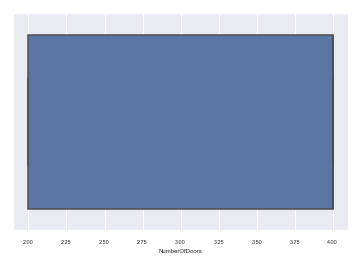

In [76]:
sns.boxplot(x=cars['NumberOfDoors'])

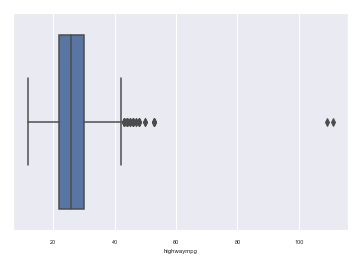

In [77]:
sns.boxplot(x=cars['highwaympg'])

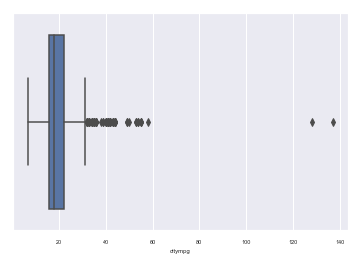

In [78]:
sns.boxplot(x=cars['citympg'])

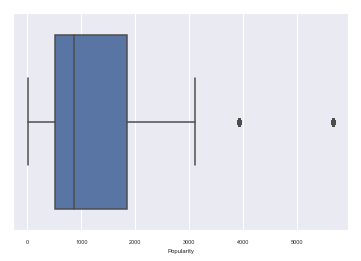

In [79]:
sns.boxplot(x=cars['Popularity'])

No outliers were found, initial thoughts pointed out at 1000HP or 0 cylinders being an outlier. However, it was determined that there'e indeed a supercar that produces over 1k HP, and there are Tesla cars in the DataSet which are electric cars and therefore use no cylinders.

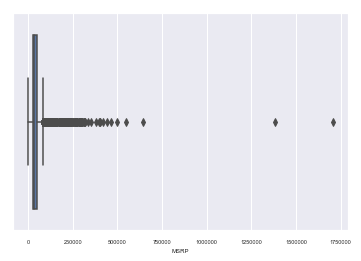

In [80]:
sns.boxplot(x=cars['MSRP'])

# Data Exploring - Distribution Plots

In [81]:
sns.distplot( cars["Year"] , color="red", label="Year")

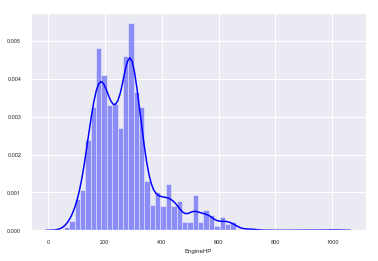

In [82]:
sns.distplot( cars["EngineHP"] , color="blue", label="HP")

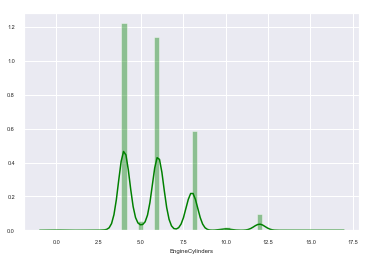

In [83]:
sns.distplot( cars["EngineCylinders"] , color="green", label="Number of Cylinders")

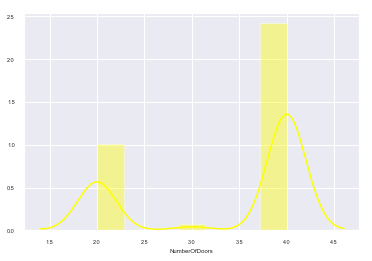

In [84]:
sns.distplot( cars["NumberOfDoors"] , color="yellow", label="Doors")

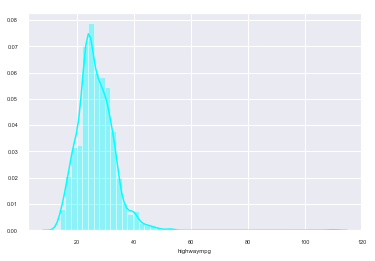

In [85]:
sns.distplot( cars["highwaympg"] , color="cyan", label="HW MPG")

In [86]:
sns.distplot( cars["citympg"] , color="black", label="city MPG")

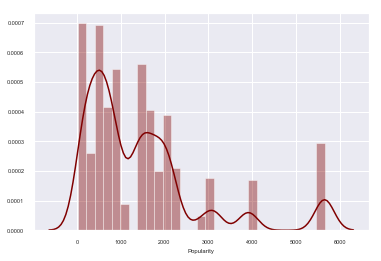

In [87]:
sns.distplot( cars["Popularity"] , color="maroon", label="popularity")

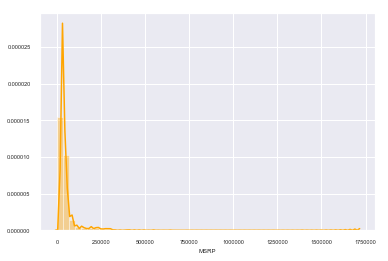

In [88]:
sns.distplot( cars["MSRP"] , color="Orange", label="Price")

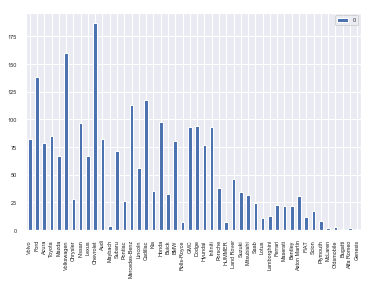

In [89]:
Brand = cars.Make
Bcounter = Counter(Brand)
count = pd.DataFrame.from_dict(Bcounter, orient='index')
count.plot(kind='bar')

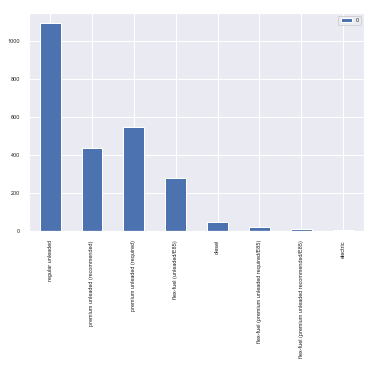

In [90]:
Fuel = cars.FuelType
Fcounter = Counter(Fuel)
count = pd.DataFrame.from_dict(Fcounter, orient='index')
count.plot(kind='bar')

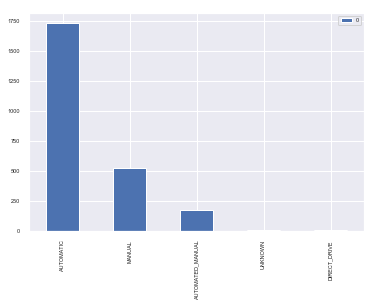

In [91]:
Tr = cars.Transmission
Tcounter = Counter(Tr)
count = pd.DataFrame.from_dict(Tcounter, orient='index')
count.plot(kind='bar')

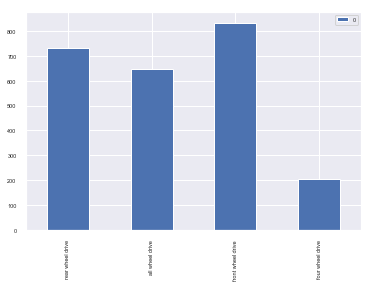

In [92]:
Dri = cars.Drive
Dcounter = Counter(Dri)
count = pd.DataFrame.from_dict(Dcounter, orient='index')
count.plot(kind='bar')

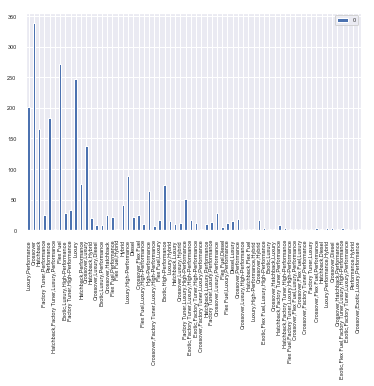

In [93]:
MK = cars.MarketCategory
Mcounter = Counter(MK)
count = pd.DataFrame.from_dict(Mcounter, orient='index')
count.plot(kind='bar')

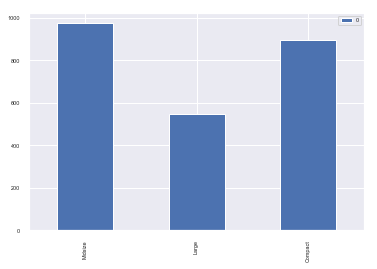

In [94]:
Size = cars.Size
Scounter = Counter(Size)
count = pd.DataFrame.from_dict(Scounter, orient='index')
count.plot(kind='bar')

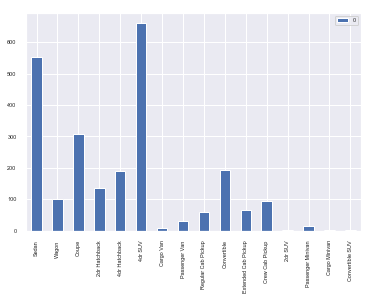

In [95]:
Style = cars.Style
Stcounter = Counter(Style)
count = pd.DataFrame.from_dict(Stcounter, orient='index')
count.plot(kind='bar')

# HeatMap

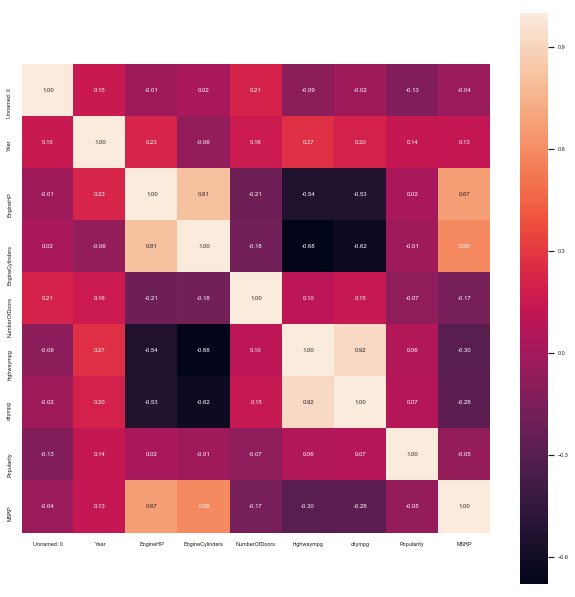

In [96]:
sns.set_style("whitegrid")
sns.set_context("paper")
sns.set(rc={"figure.figsize":(10.5,10.5)})

cols = list(numcar)
cm = np.corrcoef(numcar.values.T)
sns.set(font_scale=.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt=".2f", yticklabels=cols, xticklabels=cols)

The three variables the show the stronger link to MSRP are: 
- Highway MPG
- City MPG
- Popularity

# Decision Trees

In [328]:
from sklearn.impute import SimpleImputer

In [581]:
#brands = ['Acura','Aston Martin', 'Audi', 'Bentley','BMW','Buick','Cadillac','Chevrolet','Chrysler','Dodge','Ferrari','FIAT','Ford','GMC','Honda','Hyundai','Infiniti','Kia','Lamborghini','Land Rover','Lexus','Lincoln','Lotus','Maserati','Maybach','Mazda','McLaren','Mercedes-Benz','Mitsubishi','Nissan','Oldsmobile','Plymouth','Pontiac','Porsche','Rolls-Royce','Saab','Scion','Subaru','Suzuki','Tesla','Toyota','Volkswagen','Volvo']
brands = cars.Make

In [582]:
keep_features = [
 'Year',
 'EngineHP',
 'EngineCylinders',
 'Transmission',
 'Drive',
 'MarketCategory',
 'Size',
 'Style',
 'highwaympg', 
 'citympg',
 'Popularity',
]

In [583]:
labels = cars[cars['Make'].isin(brands)]['Make']
features = cars[cars['Make'].isin(brands)][keep_features]

In [584]:
features.shape, labels.shape

((2418, 11), (2418,))

# Visualization

In [585]:
features.describe()

Year     EngineHP  EngineCylinders   highwaympg      citympg  \
count  2418.000000  2418.000000      2418.000000  2418.000000  2418.000000   
mean   2012.127378   273.681555         5.776261    26.500827    19.458230   
std       6.296848   112.685753         1.886077     6.450938     6.634755   
min    1990.000000    55.000000         0.000000    12.000000     7.000000   
25%    2010.000000   190.000000         4.000000    22.000000    16.000000   
50%    2015.000000   265.000000         6.000000    26.000000    18.000000   
75%    2016.000000   317.000000         6.000000    30.000000    22.000000   
max    2017.000000  1001.000000        16.000000   111.000000   137.000000   

        Popularity  
count  2418.000000  
mean   1445.509098  
std    1373.709831  
min      21.000000  
25%     520.000000  
50%     873.000000  
75%    1851.000000  
max    5657.000000

In [664]:
features.isna().sum() ##This is made to determine if, and how many null values exist in the features subDS

Unnamed: 0         0
Make               0
Model              0
Year               0
FuelType           0
EngineHP           0
EngineCylinders    0
Transmission       0
Drive              0
NumberOfDoors      0
MarketCategory     0
Size               0
Style              0
highwaympg         0
citympg            0
Popularity         0
dtype: int64

No null values

In [587]:
imputer = SimpleImputer(strategy='mean')

In [588]:
features['EngineHP']  = imputer.fit_transform(features[['EngineHP']])
features.shape

(2418, 11)

In [589]:
features.dtypes

Year                 int64
EngineHP           float64
EngineCylinders    float64
Transmission        object
Drive               object
MarketCategory      object
Size                object
Style               object
highwaympg           int64
citympg              int64
Popularity           int64
dtype: object

In [590]:
from sklearn.preprocessing import LabelEncoder

In [591]:
feature_dummies = pd.get_dummies(features)

# Data Split

In [592]:
X_train, X_test, y_train, y_test = train_test_split(feature_dummies, labels, test_size=0.30, random_state=200)

In [593]:
X_train.shape

(1692, 98)

In [594]:
X_test.shape

(726, 98)

In [595]:
y_test

381            Toyota
512         Chevrolet
3237             Ford
1303           HUMMER
103           Hyundai
493              Ford
2977             Audi
515        Land Rover
2431              Kia
3041          Pontiac
2605            Buick
2191            Lexus
1119            Honda
1643       Volkswagen
3501           Toyota
476          Chrysler
2588         Infiniti
1891              GMC
1815          Bentley
1092            Dodge
2158           Suzuki
3486           Subaru
1495      Lamborghini
2757          Lincoln
1787           Toyota
1980    Mercedes-Benz
3158        Chevrolet
2888            Mazda
878         Chevrolet
584     Mercedes-Benz
            ...      
1240           HUMMER
2952              GMC
2049              GMC
2000    Mercedes-Benz
3058              Kia
2447          Bentley
421             Buick
725             Dodge
3005          Hyundai
216         Chevrolet
3139              GMC
2458          Pontiac
1720         Infiniti
2472          Porsche
961       

# Into the actual Tree

In [596]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
import graphviz 

In [597]:
dot_data = export_graphviz(clf, out_file=None, 
                     feature_names=feature_dummies.columns,  
                     class_names=labels.unique(),  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [598]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [599]:
y_pred = clf.predict(X_test)
y_pred

array(['Toyota', 'Chevrolet', 'Ford', 'HUMMER', 'Hyundai', 'Ford', 'Audi',
       'Land Rover', 'Kia', 'Pontiac', 'Buick', 'Lexus', 'Honda',
       'Volkswagen', 'Toyota', 'Chrysler', 'Infiniti', 'GMC', 'Bentley',
       'Dodge', 'Suzuki', 'Subaru', 'Lamborghini', 'Lincoln', 'Toyota',
       'Mercedes-Benz', 'Chevrolet', 'Mazda', 'Chevrolet',
       'Mercedes-Benz', 'Dodge', 'FIAT', 'Ford', 'Ford', 'Chevrolet',
       'Aston Martin', 'GMC', 'Honda', 'Maserati', 'Lexus', 'Lincoln',
       'Lexus', 'Mercedes-Benz', 'Nissan', 'Honda', 'Dodge', 'Infiniti',
       'Infiniti', 'Hyundai', 'Land Rover', 'Mercedes-Benz', 'Audi',
       'Ford', 'Cadillac', 'Toyota', 'Dodge', 'Chevrolet', 'Audi',
       'Chevrolet', 'Infiniti', 'Chevrolet', 'Honda', 'Acura', 'Dodge',
       'Honda', 'Chevrolet', 'Mitsubishi', 'Infiniti', 'GMC', 'Infiniti',
       'GMC', 'Infiniti', 'Chevrolet', 'Chevrolet', 'Cadillac',
       'Mercedes-Benz', 'Honda', 'Bentley', 'Saab', 'Volkswagen', 'Acura',
       'Lincoln', 'C

In [600]:
accuracy_score(y_pred, y_test)

0.9972451790633609

In [601]:
print(classification_report(y_pred, y_test))

               precision    recall  f1-score   support

        Acura       1.00      1.00      1.00        24
 Aston Martin       1.00      1.00      1.00         7
         Audi       1.00      1.00      1.00        25
          BMW       1.00      1.00      1.00        18
      Bentley       1.00      1.00      1.00         6
        Buick       1.00      1.00      1.00         9
     Cadillac       1.00      1.00      1.00        38
    Chevrolet       1.00      1.00      1.00        59
     Chrysler       1.00      1.00      1.00         9
        Dodge       1.00      1.00      1.00        30
         FIAT       1.00      1.00      1.00         7
      Ferrari       1.00      1.00      1.00        11
         Ford       1.00      1.00      1.00        48
          GMC       1.00      1.00      1.00        33
      Genesis       0.00      0.00      0.00         0
       HUMMER       1.00      1.00      1.00         3
        Honda       1.00      1.00      1.00        35
      Hyu

C:\Anaconda\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Anaconda\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Anaconda\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [602]:
plot_confusion_matrix(y_true=y_test, y_pred=y_pred,
                      title='Confusion matrix')

Confusion matrix, without normalization
[[24  0  0 ...  0  0  0]
 [ 0  7  0 ...  0  0  0]
 [ 0  0 25 ...  0  0  0]
 ...
 [ 0  0  0 ... 25  0  0]
 [ 0  0  0 ...  0 50  0]
 [ 0  0  0 ...  0  0 20]]


In [603]:
[unique_labels(y_test, y_pred)]

[array(['Acura', 'Aston Martin', 'Audi', 'BMW', 'Bentley', 'Buick',
        'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'FIAT', 'Ferrari',
        'Ford', 'GMC', 'Genesis', 'HUMMER', 'Honda', 'Hyundai', 'Infiniti',
        'Kia', 'Lamborghini', 'Land Rover', 'Lexus', 'Lincoln', 'Lotus',
        'Maserati', 'Mazda', 'Mercedes-Benz', 'Mitsubishi', 'Nissan',
        'Oldsmobile', 'Plymouth', 'Pontiac', 'Porsche', 'Rolls-Royce',
        'Saab', 'Scion', 'Subaru', 'Suzuki', 'Toyota', 'Volkswagen',
        'Volvo'], dtype='<U13')]

In [604]:
pd.DataFrame({'Actual': y_test,'Predictions': y_pred})

Actual    Predictions
381          Toyota         Toyota
512       Chevrolet      Chevrolet
3237           Ford           Ford
1303         HUMMER         HUMMER
103         Hyundai        Hyundai
493            Ford           Ford
2977           Audi           Audi
515      Land Rover     Land Rover
2431            Kia            Kia
3041        Pontiac        Pontiac
2605          Buick          Buick
2191          Lexus          Lexus
1119          Honda          Honda
1643     Volkswagen     Volkswagen
3501         Toyota         Toyota
476        Chrysler       Chrysler
2588       Infiniti       Infiniti
1891            GMC            GMC
1815        Bentley        Bentley
1092          Dodge          Dodge
2158         Suzuki         Suzuki
3486         Subaru         Subaru
1495    Lamborghini    Lamborghini
2757        Lincoln        Lincoln
1787         Toyota         Toyota
1980  Mercedes-Benz  Mercedes-Benz
3158      Chevrolet      Chevrolet
2888          Mazda          Mazda
878       Chevrolet      Chevrolet
584   Mercedes-Benz  Mercedes-Benz
...             ...            ...
1240         HUMMER         HUMMER
2952            GMC            GMC
2049            GMC            GMC
2000  Mercedes-Benz  Mercedes-Benz
3058            Kia            Kia
2447        Bentley        Bentley
421           Buick          Buick
725           Dodge          Dodge
3005        Hyundai        Hyundai
216       Chevrolet      Chevrolet
3139            GMC            GMC
2458        Pontiac        Pontiac
1720       Infiniti       Infiniti
2472        Porsche        Porsche
961           Dodge          Dodge
1911            GMC            GMC
3406         Subaru         Subaru
3315            GMC            GMC
15       Volkswagen     Volkswagen
3023           Audi           Audi
2490         Toyota         Toyota
640         Lincoln        Lincoln
19            Lexus          Lexus
2007     Land Rover     Land Rover
2552        Lincoln        Lincoln
3092           Ford           Ford
690      Volkswagen     Volkswagen
299             GMC            GMC
531       Chevrolet      Chevrolet
534          Toyota         Toyota

[726 rows x 2 columns]

# HyperParameters

In [392]:
clf = DecisionTreeClassifier(max_depth=2)

In [393]:
clf = clf.fit(X_train, y_train)

In [394]:
dot_data = export_graphviz(clf, out_file=None, 
                     feature_names=feature_dummies.columns,  
                     class_names=labels.unique(),  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

Confusion matrix, without normalization
[[ 0  0  0 ...  0 24  0]
 [ 0  0  0 ...  0  7  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0 50  0]
 [ 0  0  0 ...  0 20  0]]


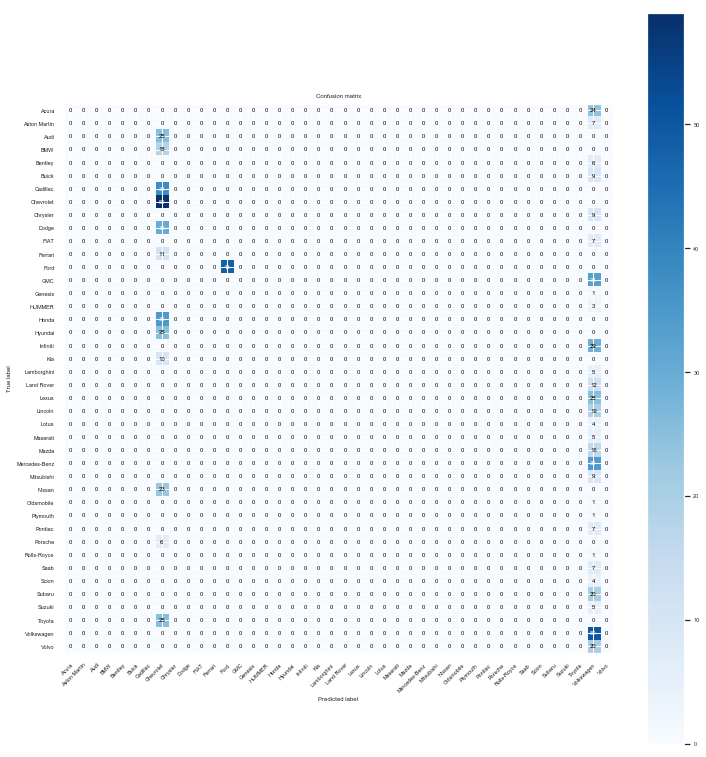

In [395]:
y_pred = clf.predict(X_test)

plot_confusion_matrix(y_true=y_test, y_pred=y_pred,
                      title='Confusion matrix')

# Random Forest

### 20 Trees in the Fores

In [606]:
cars.dropna(axis=0, subset=['MSRP'], inplace=True)

labels = cars['MSRP']
features = cars.drop('MSRP', axis=1)

features.shape, labels.shape

C:\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


((2418, 16), (2418,))

In [607]:
features.isna().sum()

Unnamed: 0         0
Make               0
Model              0
Year               0
FuelType           0
EngineHP           0
EngineCylinders    0
Transmission       0
Drive              0
NumberOfDoors      0
MarketCategory     0
Size               0
Style              0
highwaympg         0
citympg            0
Popularity         0
dtype: int64

No null values

In [608]:
features.dtypes

Unnamed: 0           int64
Make                object
Model               object
Year                 int64
FuelType            object
EngineHP           float64
EngineCylinders    float64
Transmission        object
Drive               object
NumberOfDoors      float64
MarketCategory      object
Size                object
Style               object
highwaympg           int64
citympg              int64
Popularity           int64
dtype: object

### Turn objects into categorical features

In [609]:
category = features.select_dtypes(object).astype('category')

In [610]:
category.head(3)

Make   Model                        FuelType Transmission  \
4  Volvo     740                regular unleaded    AUTOMATIC   
6   Ford    Flex  premium unleaded (recommended)    AUTOMATIC   
7  Acura  Legend                regular unleaded       MANUAL   

               Drive      MarketCategory     Size  Style  
4   rear wheel drive  Luxury,Performance  Midsize  Sedan  
6    all wheel drive           Crossover    Large  Wagon  
7  front wheel drive  Luxury,Performance  Midsize  Coupe

In [611]:
category = pd.get_dummies(category)
category.shape

(2418, 730)

### Numerics

In [612]:
numeric = features.select_dtypes(include=[int,float])
numeric.head()

EngineHP  EngineCylinders  NumberOfDoors
4      162.0              4.0            4.0
6      365.0              6.0            4.0
7      230.0              6.0            2.0
10     106.0              4.0            2.0
13     274.0              4.0            4.0

In [613]:
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
numeric =  pd.DataFrame(imputer.fit_transform(numeric), columns=numeric.columns, index=numeric.index)

features_clean = category.join(numeric)
features_clean.shape

(2418, 733)

## Data Split

In [614]:
X_train, X_test, y_train, y_test = train_test_split(features_clean, labels, test_size=0.30, random_state=202)

In [615]:
X_train.shape

(1692, 733)

In [616]:
X_test.shape

(726, 733)

## Into the Forest

In [617]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=20, n_jobs=-1) 
clf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [618]:
clf.estimators_[0:5]

[DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=647478691, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=2080478300, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1761420330, splitter='best'),
 DecisionTreeRegress

In [619]:
dot_data = export_graphviz(clf.estimators_[0], out_file=None, 
                     feature_names=features_clean.columns,  
                     class_names=labels.unique(),  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

# Metrics

In [620]:
from sklearn.metrics import r2_score, mean_squared_error

## Individual Performance

In [621]:
tree_predictions = clf.estimators_[0].predict(X_test)
r2_score(y_test, tree_predictions)

0.8601085312104435

In [622]:
sqrt(mean_squared_error(y_test, tree_predictions))

22195.37041605387

## What about all of the trees?

In [623]:
forest_preditions = clf.predict(X_test)
r2_score(y_test, forest_preditions)

0.9173704209478615

In [624]:
sqrt(mean_squared_error(y_test, forest_preditions))

17058.253041317927

In [625]:
preds = np.stack([t.predict(X_test) for t in clf.estimators_]) 

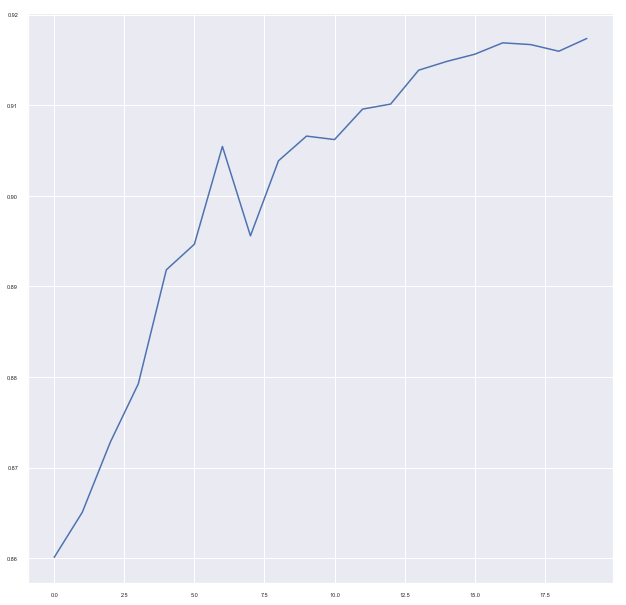

In [626]:
plt.plot([r2_score(y_test, np.mean(preds[:i+1], axis=0)) for i in range(clf.n_estimators)])

### 200 trees in forest

In [627]:
clf = RandomForestRegressor(n_estimators=200, n_jobs=-1) 
clf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [628]:
clf.estimators_[0:5]

[DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1423841193, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=386864188, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1076803512, splitter='best'),
 DecisionTreeRegress

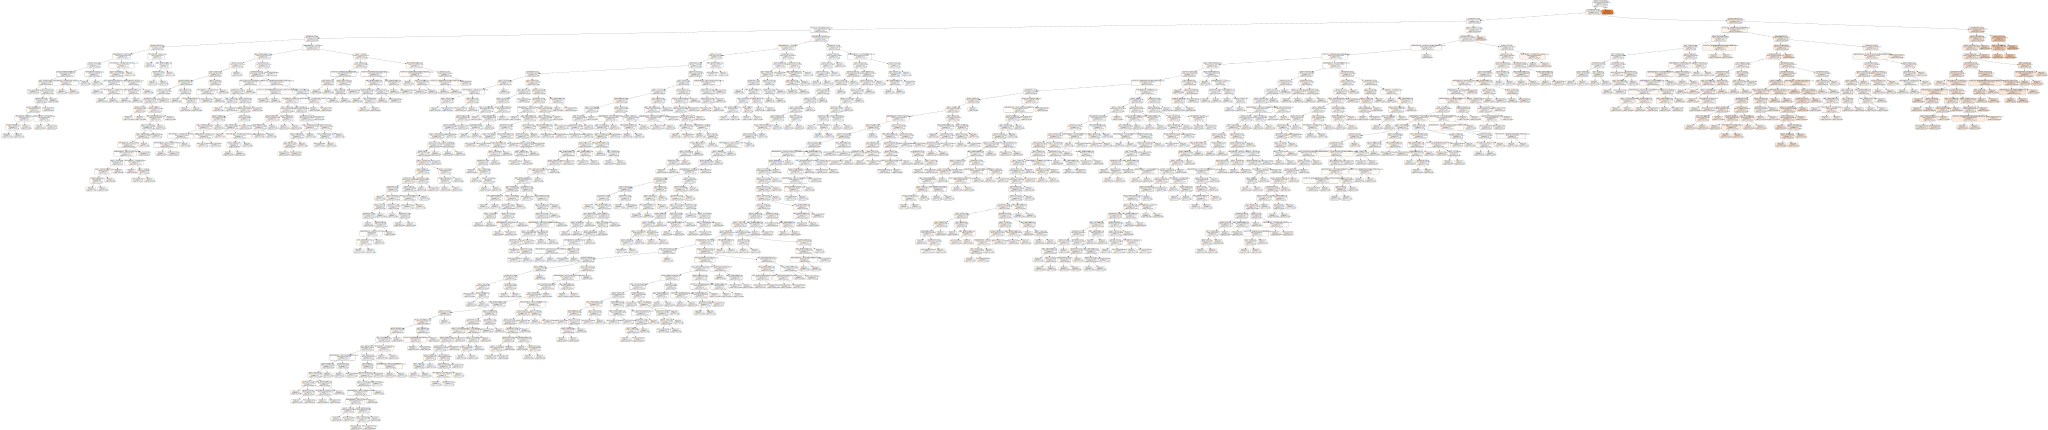

In [629]:
dot_data = export_graphviz(clf.estimators_[0], out_file=None, 
                     feature_names=features_clean.columns,  
                     class_names=labels.unique(),  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

## Metrics 200 trees

### Individual Performance

In [630]:
tree_predictions = clf.estimators_[0].predict(X_test)
r2_score(y_test, tree_predictions)

0.8290224142398305

In [631]:
sqrt(mean_squared_error(y_test, tree_predictions))

24537.842384801148

### Performance for the 200 trees

In [632]:
forest_preditions = clf.predict(X_test)
r2_score(y_test, forest_preditions)

0.9225915030822934

In [633]:
sqrt(mean_squared_error(y_test, forest_preditions))

16510.533228735258

In [634]:
preds = np.stack([t.predict(X_test) for t in clf.estimators_]) 

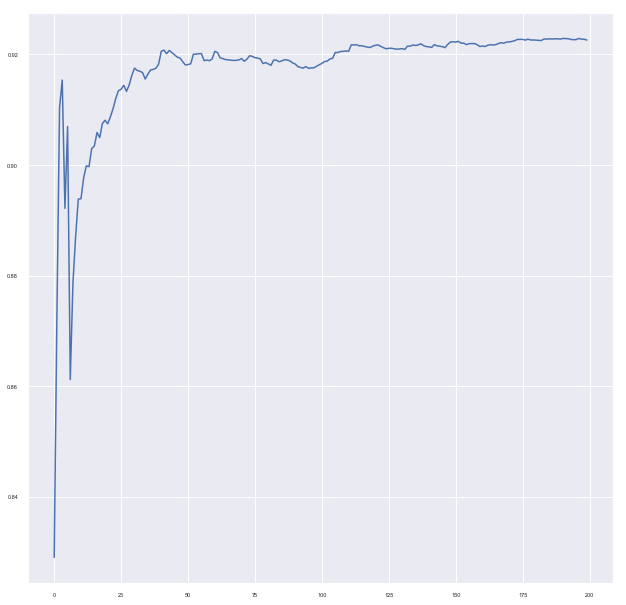

In [635]:
plt.plot([r2_score(y_test, np.mean(preds[:i+1], axis=0)) for i in range(clf.n_estimators)])

# Let's try 500 Trees

In [636]:
clf = RandomForestRegressor(n_estimators=500, n_jobs=-1) 
clf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [637]:
clf.estimators_[0:5]

[DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1906756155, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=580712838, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1711823047, splitter='best'),
 DecisionTreeRegress

In [638]:
dot_data = export_graphviz(clf.estimators_[0], out_file=None, 
                     feature_names=features_clean.columns,  
                     class_names=labels.unique(),  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

# Metrics for 500 Trees 

### Individual Performance

In [553]:
tree_predictions = clf.estimators_[0].predict(X_test)
r2_score(y_test, tree_predictions)

0.8509961893431345

In [554]:
sqrt(mean_squared_error(y_test, tree_predictions))

22906.855167213558

### Performance for the whole Forest

In [555]:
forest_preditions = clf.predict(X_test)
r2_score(y_test, forest_preditions)

0.9071417799399102

In [556]:
sqrt(mean_squared_error(y_test, forest_preditions))

18083.269702708712

In [557]:
preds = np.stack([t.predict(X_test) for t in clf.estimators_]) 

In [558]:
plt.plot([r2_score(y_test, np.mean(preds[:i+1], axis=0)) for i in range(clf.n_estimators)])

# OOB Score

In [645]:
clf = RandomForestRegressor(n_estimators=20, 
                            oob_score=True, 
                            n_jobs=-1)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
clf.oob_score_, r2_score(y_test, pred)

C:\Anaconda\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


(0.6349276698242461, 0.9178757284400018)

In [639]:
clf = RandomForestRegressor(n_estimators=200, 
                            oob_score=True, 
                            n_jobs=-1)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
clf.oob_score_, r2_score(y_test, pred)

(0.6559642561641861, 0.9211976564108494)

In [646]:
clf = RandomForestRegressor(n_estimators=500, 
                            oob_score=True, 
                            n_jobs=-1)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
clf.oob_score_, r2_score(y_test, pred)

(0.6506835062613536, 0.923245622218117)

# HyperParameters

In [640]:
from sklearn.ensemble import ExtraTreesRegressor
X_train.shape

(1692, 733)

In [649]:
%%time
clf = RandomForestRegressor(n_estimators=20, 
                            oob_score=True,
                            min_samples_leaf=2,
                            n_jobs=-1,
                            bootstrap=True)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

print(clf.oob_score_, r2_score(y_test, pred))

0.6031333542345143 0.881964556523055
Wall time: 372 ms


In [647]:
%%time
clf = RandomForestRegressor(n_estimators=200, 
                            oob_score=True,
                            min_samples_leaf=2,
                            n_jobs=-1,
                            bootstrap=True)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

print(clf.oob_score_, r2_score(y_test, pred))

0.5931845674130919 0.9077882674080745
Wall time: 1.73 s


In [650]:
%%time
clf = RandomForestRegressor(n_estimators=500, 
                            oob_score=True,
                            min_samples_leaf=2,
                            n_jobs=-1,
                            bootstrap=True)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

print(clf.oob_score_, r2_score(y_test, pred))

0.6123459544162617 0.9084080000223629
Wall time: 3.75 s


## R2 Score

In [651]:
%%time
clf = ExtraTreesRegressor(n_estimators=20, 
#                             min_samples_leaf=3,
                            max_features=0.5,
                            max_depth = 7,
                            n_jobs=-1)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

print(r2_score(y_test, pred))

0.8755542413829754
Wall time: 240 ms


In [653]:
%%time
clf = ExtraTreesRegressor(n_estimators=200, 
#                             min_samples_leaf=3,
                            max_features=0.5,
                            max_depth = 7,
                            n_jobs=-1)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

print(r2_score(y_test, pred))

0.8793290350815844
Wall time: 713 ms


In [654]:
%%time
clf = ExtraTreesRegressor(n_estimators=500, 
#                             min_samples_leaf=3,
                            max_features=0.5,
                            max_depth = 7,
                            n_jobs=-1)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

print(r2_score(y_test, pred))

0.8788349435449253
Wall time: 1.54 s


# Features Importance

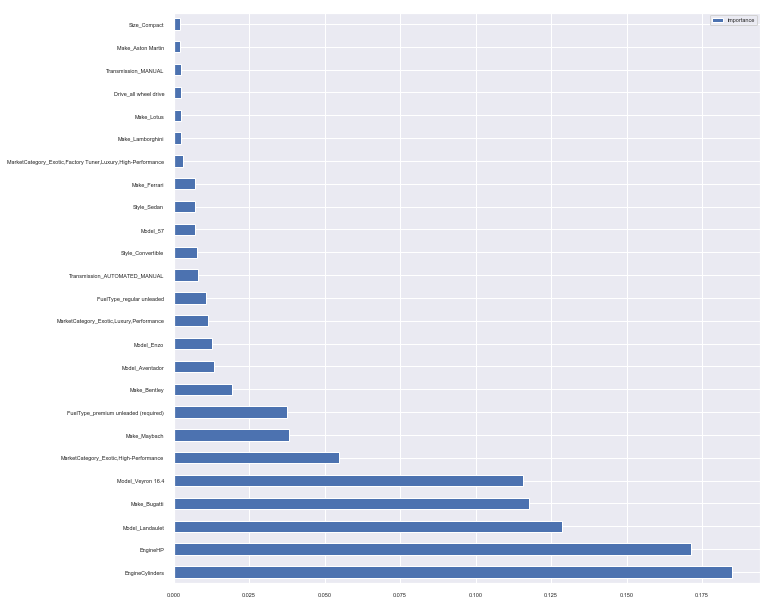

In [643]:
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

feature_importances.iloc[0:25].plot.barh()

In [644]:
feature_importances[feature_importances['importance']> feature_importances['importance'].mean()] 

importance
EngineCylinders                                       0.184821
EngineHP                                              0.171200
Model_Landaulet                                       0.128683
Make_Bugatti                                          0.117698
Model_Veyron 16.4                                     0.115641
MarketCategory_Exotic,High-Performance                0.054750
Make_Maybach                                          0.038183
FuelType_premium unleaded (required)                  0.037652
Make_Bentley                                          0.019346
Model_Aventador                                       0.013223
Model_Enzo                                            0.012726
MarketCategory_Exotic,Luxury,Performance              0.011216
FuelType_regular unleaded                             0.010655
Transmission_AUTOMATED_MANUAL                         0.008014
Style_Convertible                                     0.007781
Model_57                                              0.007140
Style_Sedan                                           0.007039
Make_Ferrari                                          0.007018
MarketCategory_Exotic,Factory Tuner,Luxury,High...    0.003089
Make_Lamborghini                                      0.002492
Make_Lotus                                            0.002379
Drive_all wheel drive                                 0.002365
Transmission_MANUAL                                   0.002336
Make_Aston Martin                                     0.002167
Size_Compact                                          0.001970
Make_Rolls-Royce                                      0.001954
Drive_rear wheel drive                                0.001642
FuelType_premium unleaded (recommended)               0.001549

In [428]:
subset_feat = feature_importances[feature_importances['importance']> feature_importances['importance'].mean()].index

In [429]:
clf = RandomForestRegressor(n_estimators=500, 
                            oob_score=True,
                            min_samples_leaf=2,
                            n_jobs=-1,
                            bootstrap=True)
clf.fit(X_train[subset_feat], y_train)
pred = clf.predict(X_test[subset_feat])

print(clf.oob_score_, r2_score(y_test, pred))

0.610741419363197 0.9049520270923765


# Boosting

In [433]:
auto_sub = cars[['FuelType', 'EngineHP', 'EngineCylinders', 'NumberOfDoors','highwaympg', 'citympg', 'Popularity']]

In [434]:
auto_sub.isna().sum()

FuelType           0
EngineHP           0
EngineCylinders    0
NumberOfDoors      0
highwaympg         0
citympg            0
Popularity         0
dtype: int64

No Null values

In [435]:
y = cars['MSRP']

In [436]:
y.tail()

3565     2288
3567    97900
3568    46675
3570    31415
3572    25675
Name: MSRP, dtype: int64

In [437]:
yc = cars['Make']

In [438]:
yc.value_counts()

Chevrolet        187
Volkswagen       160
Ford             138
Cadillac         117
Mercedes-Benz    113
Honda             98
Nissan            97
Dodge             94
GMC               93
Infiniti          93
Toyota            85
Volvo             82
Audi              82
BMW               80
Acura             79
Hyundai           77
Subaru            71
Lexus             67
Mazda             67
Lincoln           56
Land Rover        46
Porsche           38
Kia               35
Suzuki            34
Buick             33
Mitsubishi        32
Aston Martin      31
Chrysler          28
Pontiac           26
Saab              24
Ferrari           23
Maserati          22
Bentley           22
Scion             17
Lamborghini       13
FIAT              12
Lotus             11
Plymouth           8
Rolls-Royce        7
HUMMER             7
Maybach            4
Oldsmobile         3
Alfa Romeo         2
McLaren            2
Bugatti            1
Genesis            1
Name: Make, dtype: int64

In [440]:
auto_sub.tail()

FuelType  EngineHP  EngineCylinders  NumberOfDoors  \
3565             regular unleaded     190.0              6.0            4.0   
3567  premium unleaded (required)     445.0              8.0            2.0   
3568             regular unleaded     240.0              4.0            4.0   
3570     flex-fuel (unleaded/E85)     285.0              8.0            3.0   
3572             regular unleaded     188.0              4.0            4.0   

      highwaympg  citympg  Popularity  
3565          25       18         190  
3567          24       16        3916  
3568          31       23         870  
3570          17       11         549  
3572          41       44        5657

In [442]:
auto_category = auto_sub.select_dtypes(object).astype('category')
auto_category.dtypes

FuelType    category
dtype: object

In [443]:
auto_category = pd.get_dummies(auto_category)
auto_category.tail()

FuelType_diesel  FuelType_electric  \
3565                0                  0   
3567                0                  0   
3568                0                  0   
3570                0                  0   
3572                0                  0   

      FuelType_flex-fuel (premium unleaded recommended/E85)  \
3565                                                  0       
3567                                                  0       
3568                                                  0       
3570                                                  0       
3572                                                  0       

      FuelType_flex-fuel (premium unleaded required/E85)  \
3565                                                  0    
3567                                                  0    
3568                                                  0    
3570                                                  0    
3572                                                  0    

      FuelType_flex-fuel (unleaded/E85)  \
3565                                  0   
3567                                  0   
3568                                  0   
3570                                  1   
3572                                  0   

      FuelType_premium unleaded (recommended)  \
3565                                        0   
3567                                        0   
3568                                        0   
3570                                        0   
3572                                        0   

      FuelType_premium unleaded (required)  FuelType_regular unleaded  
3565                                     0                          1  
3567                                     1                          0  
3568                                     0                          1  
3570                                     0                          0  
3572                                     0                          1

In [444]:
auto_numeric = auto_sub.select_dtypes(exclude='object')
auto_final = auto_category.join(auto_numeric)
auto_final.tail()

FuelType_diesel  FuelType_electric  \
3565                0                  0   
3567                0                  0   
3568                0                  0   
3570                0                  0   
3572                0                  0   

      FuelType_flex-fuel (premium unleaded recommended/E85)  \
3565                                                  0       
3567                                                  0       
3568                                                  0       
3570                                                  0       
3572                                                  0       

      FuelType_flex-fuel (premium unleaded required/E85)  \
3565                                                  0    
3567                                                  0    
3568                                                  0    
3570                                                  0    
3572                                                  0    

      FuelType_flex-fuel (unleaded/E85)  \
3565                                  0   
3567                                  0   
3568                                  0   
3570                                  1   
3572                                  0   

      FuelType_premium unleaded (recommended)  \
3565                                        0   
3567                                        0   
3568                                        0   
3570                                        0   
3572                                        0   

      FuelType_premium unleaded (required)  FuelType_regular unleaded  \
3565                                     0                          1   
3567                                     1                          0   
3568                                     0                          1   
3570                                     0                          0   
3572                                     0                          1   

      EngineHP  EngineCylinders  NumberOfDoors  highwaympg  citympg  \
3565     190.0              6.0            4.0          25       18   
3567     445.0              8.0            2.0          24       16   
3568     240.0              4.0            4.0          31       23   
3570     285.0              8.0            3.0          17       11   
3572     188.0              4.0            4.0          41       44   

      Popularity  
3565         190  
3567        3916  
3568         870  
3570         549  
3572        5657

## Data Split

In [445]:
X_train, X_test, y_train, y_test = train_test_split(auto_final, y, test_size=0.30, random_state=100)
Xc_train, Xc_test, yc_train, yc_test = train_test_split(auto_final, yc, test_size=0.30, random_state=100)

In [446]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1692, 14)
(726, 14)
(1692,)
(726,)


# Adaboost Regression

In [447]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor

In [660]:
adaboost_reg = AdaBoostRegressor(n_estimators=20, learning_rate=1, loss='linear')

adaboost_reg.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1, loss='linear',
         n_estimators=20, random_state=None)

In [661]:
prediction_train = adaboost_reg.score(X_train,y_train)
prediction_test = adaboost_reg.score(X_test,y_test)
print(prediction_train)
print(prediction_test)

0.913223369191366
0.7820351394052085


In [655]:
adaboost_reg = AdaBoostRegressor(n_estimators=200, learning_rate=1, loss='linear')

adaboost_reg.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1, loss='linear',
         n_estimators=200, random_state=None)

In [656]:
prediction_train = adaboost_reg.score(X_train,y_train)
prediction_test = adaboost_reg.score(X_test,y_test)
print(prediction_train)
print(prediction_test)

0.6804564001021551
0.4485856520471582


In [658]:
adaboost_reg = AdaBoostRegressor(n_estimators=500, learning_rate=1, loss='linear')

adaboost_reg.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1, loss='linear',
         n_estimators=500, random_state=None)

In [659]:
prediction_train = adaboost_reg.score(X_train,y_train)
prediction_test = adaboost_reg.score(X_test,y_test)
print(prediction_train)
print(prediction_test)

0.6125660183914169
0.3370021547862283


# Adaboost Classification

In [662]:
AdaBoost = AdaBoostClassifier(n_estimators=20,learning_rate=1,algorithm='SAMME')
AdaBoost.fit(Xc_train,yc_train)
c_pred_train = AdaBoost.score(Xc_train,yc_train)
c_pred_test = AdaBoost.score(Xc_test,y_test)

print(c_pred_train)
print(c_pred_test)

0.11229314420803782
0.0


In [657]:
AdaBoost = AdaBoostClassifier(n_estimators=200,learning_rate=1,algorithm='SAMME')
AdaBoost.fit(Xc_train,yc_train)
c_pred_train = AdaBoost.score(Xc_train,yc_train)
c_pred_test = AdaBoost.score(Xc_test,y_test)

print(c_pred_train)
print(c_pred_test)

0.23286052009456265
0.0


In [663]:
AdaBoost = AdaBoostClassifier(n_estimators=500,learning_rate=1,algorithm='SAMME')
AdaBoost.fit(Xc_train,yc_train)
c_pred_train = AdaBoost.score(Xc_train,yc_train)
c_pred_test = AdaBoost.score(Xc_test,y_test)

print(c_pred_train)
print(c_pred_test)

0.4781323877068558
0.0


# XGBoost

In [453]:
! pip install xgboost

In [454]:
import xgboost as xgb

In [455]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

C:\Anaconda\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [456]:
param = {'booster': 'gbtree', 'max_depth': 5, 'eta': 0.8, 'gamma': .01}

In [458]:
num_round = 100
bst = xgb.train(param, dtrain, num_round)

y_train_pred = bst.predict(dtrain)
y_test_pred = bst.predict(dtest)

In [459]:
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

0.9059127942729333
0.6577271841483212


# Cross-Validation

#### Response Variable

In [488]:
y = cars['MSRP'] ## Response variable
y_fuel = cars['FuelType'] ## Categorical Response variable with few levels
yc = cars['Make'] ## Categorical Response variable

In [489]:
adaboost_reg = AdaBoostRegressor(n_estimators=200, learning_rate=1, loss='linear')

In [490]:
len(auto_final)

2418

## K-Folds CV

In [491]:
from sklearn.model_selection import KFold

# prepare cross validation
kfold = KFold(n_splits=5, shuffle=False, random_state=91)
# correct = 0

for train, test in kfold.split(auto_final):

    adaboost_reg.fit(auto_final.iloc[train], y.iloc[train])
    prediction_train = adaboost_reg.score(auto_final.iloc[train], y.iloc[train])
    prediction_test = adaboost_reg.score(auto_final.iloc[test], y.iloc[test])
#     correct += prediction_test
    print(prediction_train)
    print(prediction_test)
    print("\n")

0.8211765776364207
0.4393543161331151


0.8130844345826929
0.7115862844753841


0.8398878023902053
0.7481019300236383


0.8858385556420891
0.5512088865009643


0.7987477443927462
0.5213261398626865




## LOOCV

In [492]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()

correct_train = 0
correct_test = 0
for train, test in loo.split(auto_final):

    adaboost_reg.fit(auto_final.iloc[train], y.iloc[train])
    prediction_train = adaboost_reg.score(auto_final.iloc[train], y.iloc[train])
    prediction_test = adaboost_reg.score(auto_final.iloc[test], y.iloc[test])
    correct_train += prediction_train
    correct_test += prediction_test
#     print(prediction_train)
#     print(prediction_test)
#     print("\n")
    
print(correct_train/len(auto_final))
print(correct_test/len(auto_final))

0.8137359789270437
0.0


# Feature Importance

#### Recursive Feature Elimination

In [493]:
from sklearn.feature_selection import rfe
from sklearn.linear_model import LogisticRegression
estimator = LogisticRegression()
selector = rfe.RFE(estimator, 5, step=1)
selector.fit(auto_final, y_fuel)
# selector.support_ 
print(selector.ranking_)
selector.n_features_

C:\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed

[ 1  9  3  2  1  1  1  1  8  4  5  7  6 10]


C:\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed

5

#### Select KBest

In [494]:
from sklearn.feature_selection import SelectKBest
kb = SelectKBest(k=3)
print('Feature scores')
print(kb.fit(auto_final, y_fuel).scores_)
print('\n')
print('P-values')
print(kb.fit(auto_final, y_fuel).pvalues_)
X_new = kb.fit_transform(auto_final, y_fuel)

Feature scores
[         inf          inf          inf          inf          inf
          inf          inf          inf 181.65607427  97.80856992
  24.56615271 145.97959172 190.94216021  17.80168045]


P-values
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 1.93842685e-216 4.89482045e-126 1.52963108e-032 7.71067738e-180
 1.45624721e-225 3.51808617e-023]


C:\Anaconda\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Anaconda\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Anaconda\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


In [495]:
kb.get_support()

array([False, False, False, False, False,  True,  True,  True, False,
       False, False, False, False, False])

#### Select From Model with Extra Trees Classifier

In [496]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(auto_final, y_fuel)
clf.feature_importances_ 

array([0.02642441, 0.00062992, 0.0035362 , 0.0101419 , 0.13445957,
       0.22170679, 0.21549823, 0.34231195, 0.01797431, 0.00960812,
       0.00470787, 0.0040917 , 0.00311118, 0.00579787])

In [497]:
from sklearn.feature_selection import SelectFromModel
clf_model = SelectFromModel(clf, threshold='median', prefit=True)

In [498]:
X_new = clf_model.transform(auto_final)
X_new.shape

(2418, 7)

In [499]:
clf_model.get_support()

array([ True, False, False,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False])